## Loading the data
1560 rows, 25 columns, 1131 non-null entries in Job_Title_Description.

In [1]:
import pandas as pd
import os

In [2]:
current_dir = os.getcwd()
print(current_dir)

my_file = os.path.join(current_dir, 'datasets', 'TrainingData.csv')
print(my_file)

C:\Users\X\Downloads\Refactored_Py_DS_ML_Bootcamp-master\27. School Budget Case Study ML
C:\Users\X\Downloads\Refactored_Py_DS_ML_Bootcamp-master\27. School Budget Case Study ML\datasets\TrainingData.csv


In [19]:
df = pd.read_csv(my_file, index_col=0, nrows=1560)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 134338 to 182510
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Function                1560 non-null   object 
 1   Use                     1560 non-null   object 
 2   Sharing                 1560 non-null   object 
 3   Reporting               1560 non-null   object 
 4   Student_Type            1560 non-null   object 
 5   Position_Type           1560 non-null   object 
 6   Object_Type             1560 non-null   object 
 7   Pre_K                   1560 non-null   object 
 8   Operating_Status        1560 non-null   object 
 9   Object_Description      1465 non-null   object 
 10  Text_2                  382 non-null    object 
 11  SubFund_Description     1192 non-null   object 
 12  Job_Title_Description   1149 non-null   object 
 13  Text_3                  405 non-null    object 
 14  Text_4                  221 non-n

##  Summarizing the data

In [15]:
# Print the summary statistics
print(df.describe())

              FTE         Total
count  515.000000  1.555000e+03
mean     0.419423  2.648311e+04
std      0.447816  6.726826e+05
min      0.000000 -1.418000e+06
25%      0.002155  7.701000e+01
50%      0.139031  4.698100e+02
75%      1.000000  4.101285e+03
max      1.021492  2.646500e+07


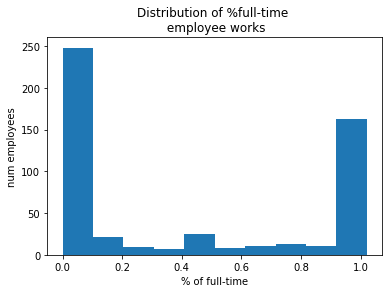

In [16]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [17]:
# There are 23 object types.
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

## Encode the labels as categorical variables

In [26]:
# create a list to save 9 columns of labels;
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']
print(type(LABELS))

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type along the row
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

<class 'list'>
Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


## Counting unique labels
counting and plotting the number of unique values for each category of label

Function        35
Use              8
Sharing          5
Reporting        3
Student_Type     9
dtype: int64


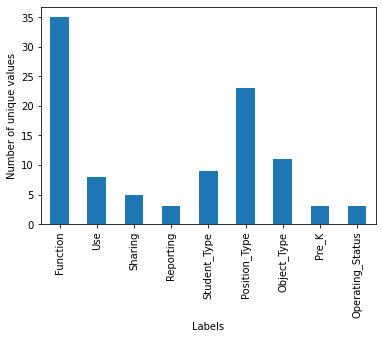

In [28]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
## pandas has pd.Series.nunique method for counting the number of unique values in a Series
num_unique_labels = df[LABELS].apply(pd.Series.nunique)
print(num_unique_labels.head())

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

## Computing log loss with NumPy
log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class. log loss metric handles the trade-off between accuracy and confidence

In [30]:
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ 
        Computes the logarithmic loss between predicted and actual when these are 1D arrays.
        
    : param predicted: The predicted probabilities as floats between 0-1
    : param actual: The actual binary labels. Either 0 or 1.
    : param eps (optional) : log(0) is inf, so we need to offset our
    
    predicted values slightly by eps from 0 or 1.
"""
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(
                        actual * np.log(predicted) + (1-actual) * np.log(1-predicted)
                        )
    return loss

In [36]:
actual_labels_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0,]
correct_confident_list = [0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05]
correct_not_confident_list = [0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35]
wrong_confident_list = [0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]
wrong_not_confident_list =  [0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65]

actual_labels = np.array(actual_labels_list)
correct_confident = np.array(correct_confident_list)
correct_not_confident = np.array(correct_not_confident_list)
wrong_confident = np.array(wrong_confident_list)
wrong_not_confident = np.array(wrong_not_confident_list)

Log loss penalizes highly confident wrong answers much more than any other type. 

In [37]:
# Compute and print log loss for 1st case - correct_confident
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case - correct_not_confident
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case - wrong_not_confident
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case -wrong_confident
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


### Setting up a train-test split in scikit-learn
Creating a simple model first helps to give us a sense of how challenging a question actually is. 

https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py

In [39]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.

        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [50]:
NUMERIC_COLUMNS = ['FTE', 'Total']

# Create the new DataFrame: numeric_data_only, replace NaN with -1000
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)
print(numeric_data_only.head(3))

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               min_count=1,
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

           FTE     Total
134338     1.0  50471.81
206341 -1000.0   3477.86
326408     1.0  62237.13
X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 134338 to 182510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     1248 non-null   float64
 1   Total   1248 non-null   float64
dtypes: float64(2)
memory usage: 29.2 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 229958 to 391230
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     312 non-null    float64
 1   Total   312 non-null    float64
dtypes: float64(2)
memory usage: 7.3 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 134338 to 182510
Data columns (total 100 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                  

The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

In [52]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               min_count=1,
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

C:\Users\X\anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\X\anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\X\anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 14 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\X\anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 33 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\X\anaconda\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\X\anaconda\lib\site-package

Accuracy: 0.0


In [ ]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv')

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.

In [ ]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

## NLP
- Tokenization is the process of splitting a long string into segments. 
- Usually, this means taking a string and splitting it into a list of strings where we have one string for each word.
- tokenization is the process of chopping up a character sequence into pieces called tokens. 
- text data is sensitive to whether or not we tokenize on punctuation
    - e.g. tokenize on whitespace and punctuation: Title I - Disadvantaged Children/Targeted Assistance =>6 Children/Targeted becomes two tokens
    - e.g. The number of 1-grams + 2-grams + 3-grams is 5 + 4 + 3 = 12 one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']

In [53]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])




There are 107 tokens in Position_Extra if we split on non-alpha numeric
['1st', '3rd', '5th', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'assistant', 'asst', 'athletic', 'attn', 'avg']


In [54]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [55]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(data_frame=df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1339 tokens in the dataset
There are 1067 alpha-numeric tokens in the dataset


In [56]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)

NameError: name 'sample_df' is not defined

In [57]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\X\anaconda\lib\site-packages\sklearn\preprocessing\__init__.py)